# Chronic Kidney Disease

## Data Set Information:

# We use the following representation to collect the dataset
<p> We use the following representation to collect the dataset </p>
<p> age - age </p>
<p> bp - blood pressure</p>
<p> sg - specific gravity Urine specific gravity is a laboratory test that shows the concentration of all chemical particles in the urine</p>
<p> al - albumin</p>
<p> su - sugar</p>
<p> rbc - red blood cells</p>
<p> pc - pus cell</p>
<p> pcc - pus cell clumps</p>
<p> ba - bacteria</p>
<p> bgr - blood glucose random</p>
<p> bu - blood urea</p>
<p> sc - serum creatinine</p>
<p> sod - sodium</p>
<p> pot - potassium</p>
<p> hemo - hemoglobin</p>
<p> pcv - packed cell volume</p>
<p> wc - white blood cell count</p>
<p> rc - red blood cell count</p>
<p> htn - hypertension</p>
<p> dm - diabetes mellitus</p>
<p> cad - coronary artery disease</p>
<p> appet - appetite</p>
<p> pe - pedal edema</p>
<p> ane - anemia</p>
<p> class - class</p>

In [ ]:
# Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from sklearn import metrics

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore') 

In [ ]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

# Database loading and pre-processing

In [ ]:
#Database loading and pre-processing

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Create function for checking missing values which accepts a dataframe as its parameter
def null_values_check(df): 
    #Error handling to prevent abnormal termination of operation
    try:
        #if-else statement for null value check 
        if(df.isnull().values.any() == True):
            #if there are null values present, print a column-wise summary of records with null values
            print('Number of null records within each column:\n' + str(df.isnull().sum()))
        else:
            print('There is no missing values in the dataset.')
    
    except Exception as e:
        logging.error(e)

#initialise variable with dataset name
dataset_name = 'C:\College\Major Project\chronic_kidney_disease.csv'

#error-handling to prevent abnormal termination of code
try:
    #import and load weather dataset into pandas dataframe
    chronic_kidney_disease_dataframe = pd.read_csv(dataset_name)
    
    #Description of Datasets
    #Print number of records and attributes of whole kidney dataset
    print('Shape of dataset: ' + str(chronic_kidney_disease_dataframe.shape))
    print('Total number of records in dataset = ' + str(chronic_kidney_disease_dataframe.shape[0]))
    print('Total number of attributes in dataset = ' + str(chronic_kidney_disease_dataframe.shape[1]))
    print('')
    #call function created to check for null values
    null_values_check(chronic_kidney_disease_dataframe)
    #Missing value imputation
    #replace ? to nan values 
    chronic_kidney_disease_dataframe = chronic_kidney_disease_dataframe.replace('?', np.nan)
                                                      
except FileNotFoundError as e:
    logging.error(e)

Shape of dataset: (400, 25)
Total number of records in dataset = 400
Total number of attributes in dataset = 25

There is no missing values in the dataset.


In [ ]:
chronic_kidney_disease_dataframe.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,NaN,18,0.8,NaN,NaN,11.3,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,53,1.8,NaN,NaN,9.6,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,56,3.8,111,2.5,11.2,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,1,1,1,1,1,1,ckd


In [ ]:
chronic_kidney_disease_dataframe.shape

(400, 25)

In [ ]:
# Description:
chronic_kidney_disease_dataframe.describe()

,rbc,pc,pcc,ba,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.117500,0.190000,0.885000,0.935000,31.982500,6178.500000,3.16575,0.627500,0.645000,0.905000,0.792500,0.807500,0.847500
std,0.322418,0.392792,0.319421,0.246835,16.962799,4490.489839,2.36621,0.484076,0.479113,0.293582,0.406024,0.394757,0.359955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,26.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000,37.000000,6900.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,1.000000,1.000000,44.000000,9400.000000,5.10000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,54.000000,26400.000000,8.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Datatypes:
chronic_kidney_disease_dataframe.dtypes

age       object
bp        object
sg        object
al        object
su        object
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr       object
bu        object
sc        object
sod       object
pot       object
hemo      object
pcv        int64
wbcc       int64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class     object
dtype: object

In [ ]:
chronic_kidney_disease_dataframe.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,NaN,18,0.8,NaN,NaN,11.3,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,53,1.8,NaN,NaN,9.6,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,56,3.8,111,2.5,11.2,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,1,1,1,1,1,1,ckd


## Replacing categorial with null value

In [ ]:
chronic_kidney_disease_dataframe['class'].value_counts()
chronic_kidney_disease_dataframe['class'] = chronic_kidney_disease_dataframe['class'].replace(to_replace={'ckd\t':'ckd'})
chronic_kidney_disease_dataframe["class"] = [1 if i == "ckd" else 0 for i in chronic_kidney_disease_dataframe["class"]]

In [ ]:
chronic_kidney_disease_dataframe.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,0,0,1,1,1,1,1
1,7,50,1.02,4,0,0,0,1,1,NaN,18,0.8,NaN,NaN,11.3,38,6000,0.0,1,1,1,1,1,1,1
2,62,80,1.01,2,3,0,0,1,1,423,53,1.8,NaN,NaN,9.6,31,7500,0.0,1,0,1,0,1,0,1
3,48,70,1.005,4,0,0,1,0,1,117,56,3.8,111,2.5,11.2,32,6700,3.9,0,1,1,0,0,0,1
4,51,80,1.01,2,0,0,0,1,1,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,1,1,1,1,1,1,1


In [ ]:
chronic_kidney_disease_dataframe.dtypes

age       object
bp        object
sg        object
al        object
su        object
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr       object
bu        object
sc        object
sod       object
pot       object
hemo      object
pcv        int64
wbcc       int64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class      int64
dtype: object

## Converting all the data types to float

In [ ]:
# taking the length of the column and converting the each column to float
colLength = (len(chronic_kidney_disease_dataframe.axes[1]))

# for storing the position of each column
count=0;

for i in chronic_kidney_disease_dataframe:
    count += 1
    # the last column of the data set is label so when we reach last column just break the loop
    if(count==25):
        break
    
    # converting each column to float data type
    
    chronic_kidney_disease_dataframe[i] = chronic_kidney_disease_dataframe[i].astype('float64')

In [ ]:
chronic_kidney_disease_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     400 non-null    float64
 6   pc      400 non-null    float64
 7   pcc     400 non-null    float64
 8   ba      400 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    float64
 19  dm      400 non-null    float64
 20  cad     400 non-null    float64
 21  appet   400 non-null    float64
 22  pe

In [ ]:
# Description:
chronic_kidney_disease_dataframe.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,400.000000,400.000000,400.000000,400.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.117500,0.190000,0.885000,0.935000,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,31.982500,6178.500000,3.16575,0.627500,0.645000,0.905000,0.792500,0.807500,0.847500,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.322418,0.392792,0.319421,0.246835,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,16.962799,4490.489839,2.36621,0.484076,0.479113,0.293582,0.406024,0.394757,0.359955,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,26.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,37.000000,6900.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,44.000000,9400.000000,5.10000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Checking for the null values

In [ ]:
# Cheaking Missing (NaN) Values:
chronic_kidney_disease_dataframe.isnull().sum().sort_values(ascending=False)

pot      88
sod      87
hemo     52
su       49
sg       47
al       46
bgr      44
bu       19
sc       17
bp       12
age       9
ba        0
pcc       0
pc        0
rbc       0
pcv       0
wbcc      0
rbcc      0
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
class     0
dtype: int64

## handling null values

In [ ]:
chronic_kidney_disease_dataframe.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [ ]:
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']

## Replacing the null value with the median

In [ ]:
for feature in features:
    chronic_kidney_disease_dataframe[feature] = chronic_kidney_disease_dataframe[feature].fillna(chronic_kidney_disease_dataframe[feature].median())

In [ ]:
chronic_kidney_disease_dataframe.isnull().any().sum()

0

## Performing Correlation and plotting heatmap

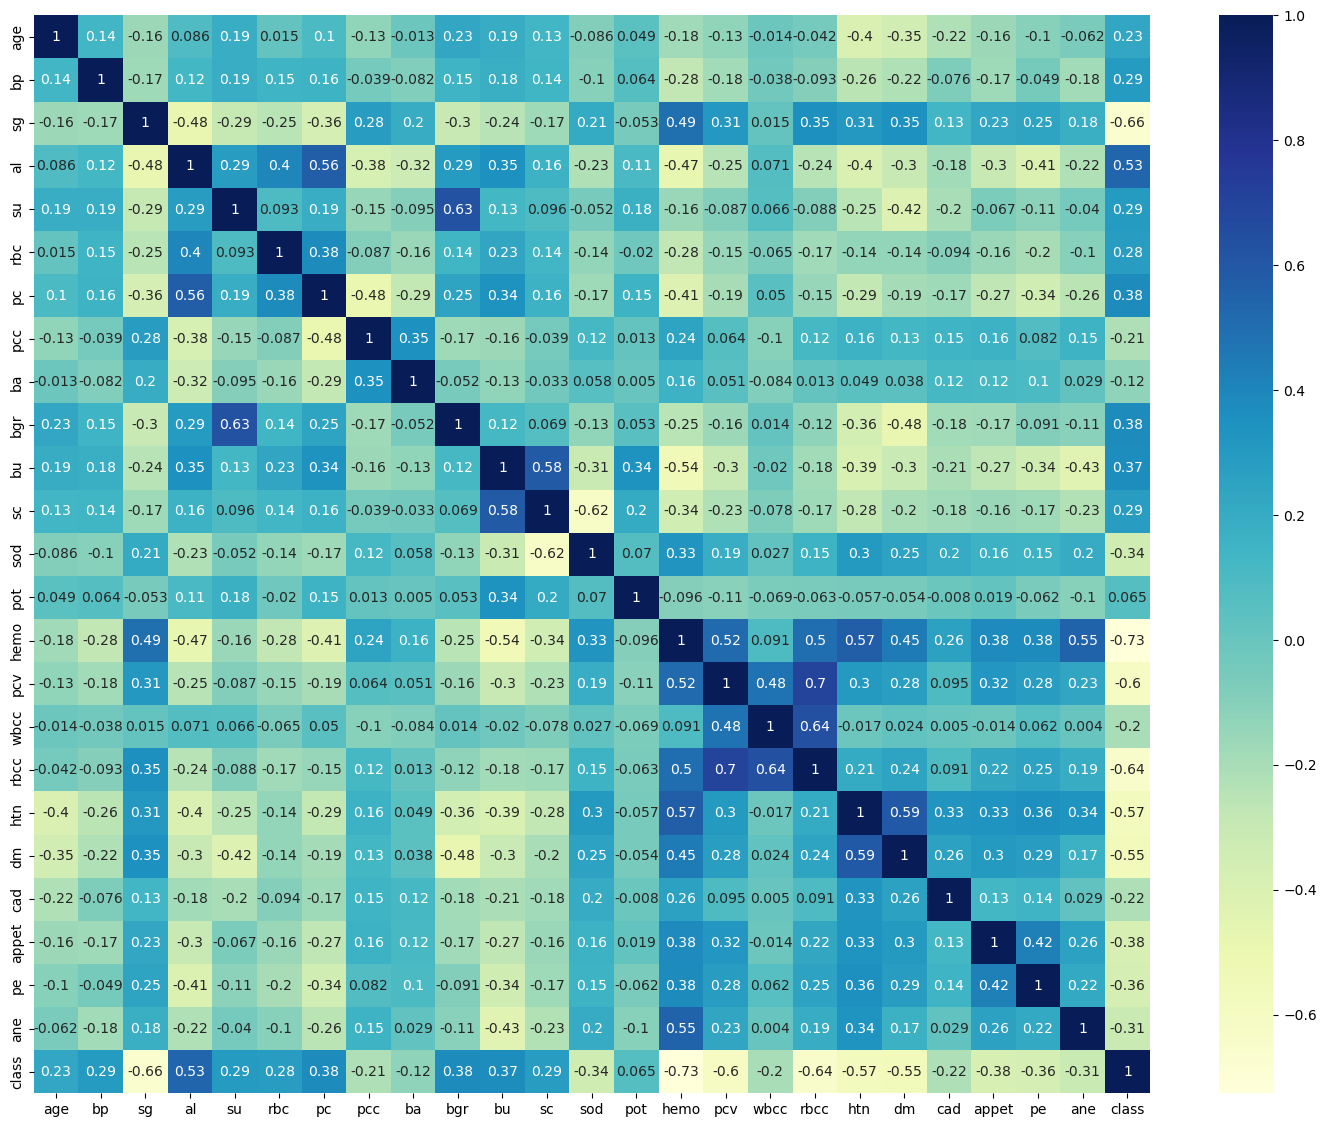

In [ ]:
# plotting of corellated 
plt.figure(figsize=(18,14))
sns.heatmap(chronic_kidney_disease_dataframe.corr().round(3), annot=True, cmap='YlGnBu')
plt.show()

In [ ]:
chronic_kidney_disease_dataframe.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,1.0,1.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,0.0,0.0,1.0,1.0,1.0,1.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,1.0,1.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,1.0,1.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,0.0,1.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,0.0,1.0,1.0,0.0,0.0,0.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,1.0,1.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,1.0,1.0,1.0,1.0,1.0,1.0,1


<AxesSubplot:xlabel='class', ylabel='count'>

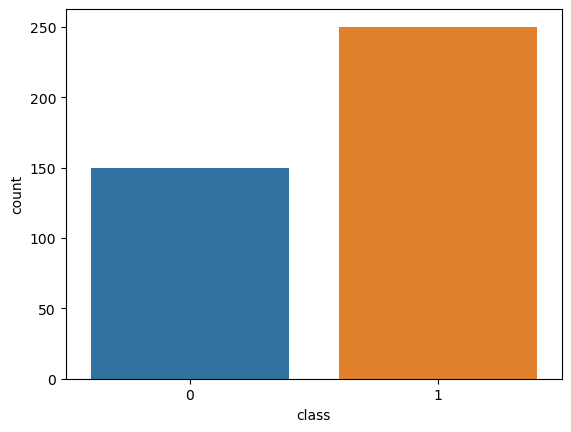

In [ ]:
# Target feature:
sns.countplot(chronic_kidney_disease_dataframe['class'])

In [ ]:
# Independent and Dependent Feature:
X = chronic_kidney_disease_dataframe.iloc[:, :-1]
y = chronic_kidney_disease_dataframe.iloc[:, -1]

In [ ]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,1.0,1.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,0.0,0.0,1.0,1.0,1.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,1.0,1.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,1.0,1.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,0.0,1.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,0.0,1.0,1.0,0.0,0.0,0.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,1.0,1.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

## Plotting graph based on the correlation feature

sg       0.135647
pcv      0.123326
htn      0.122978
dm       0.108639
rbcc     0.102232
hemo     0.096103
al       0.062931
pc       0.038480
appet    0.030880
bgr      0.021082
pe       0.019412
sc       0.017700
wbcc     0.016755
rbc      0.015063
bp       0.015005
ane      0.013696
bu       0.013632
sod      0.012467
su       0.010255
age      0.008959
pot      0.006933
cad      0.004513
pcc      0.002488
ba       0.000824
dtype: float64


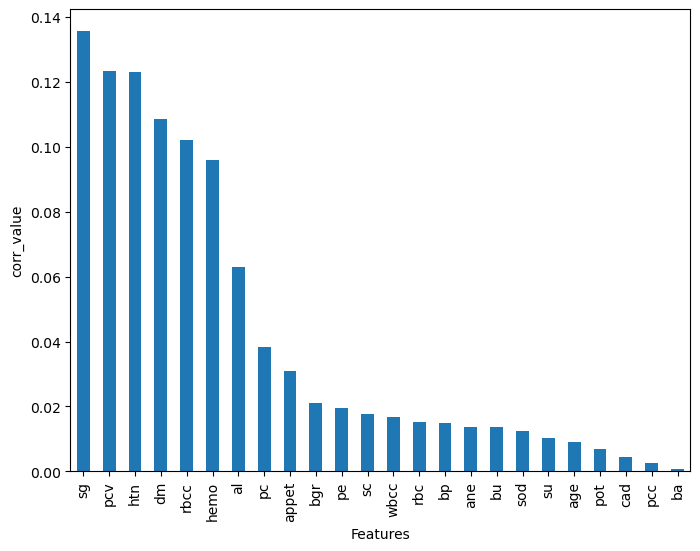

In [ ]:
# Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='bar',xlabel="Features",ylabel="corr_value")
print(ranked_features.sort_values(ascending=False))
plt.show()

### Function for calling different classifier and selecting the best feature from the correlation

In [ ]:
# selecting the top feature
def selectFeature(n):
    return ranked_features.nlargest(n).index

# for selecting all the details of the dataset based on the selected top feature
# chronic_kidney_disease_dataframe[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]
dataset=[]
def topFeature(feature):
    dataset=[]
    topFeature = []
    for i in feature:
        topFeature.append(i)
    dataset.append(topFeature)
    return dataset
    
    
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# the classifier function

# calling classifier
def classifierUsed(selectedDataSetForTraining,feature,number):
    randomForestClassifier(selectedDataSetForTraining,feature,number)
    decisionTreeClassifier(selectedDataSetForTraining,feature,number)
    KNNClassifier(selectedDataSetForTraining,feature,number)
    logisticRegressionClassifier(selectedDataSetForTraining,feature,number)
    supportVectorMachineClassifier(selectedDataSetForTraining,feature,number)
    
    
# function for random forest classifiers
def numberOfFeatureForClassifier(number):
    selectedFeature = selectFeature(number)
    feature =[]
    for i in selectedFeature:
        # appending the selected feature into a list
        feature.append(i)

    selectedDataSetForTraining = topFeature(feature)
    
    # calling the classifier function
    classifierUsed(selectedDataSetForTraining,feature,number)
    
n_Featurelist = []            # To store no of features

# Format: list = [[Accuracy scores],[Percision scores],[F1 scores],[Recall scores]]

rf_list = [[],[],[],[]]       # To store rf performance
dt_list = [[],[],[],[]]       # To store dt performance
lr_list = [[],[],[],[]]       # To store lr performance
knn_list = [[],[],[],[]]      # To store knn performance
svm_list = [[],[],[],[]]      # To store svm performance

## Random Forest Classifier

In [ ]:
# Random Forest classifier function
from sklearn.ensemble import RandomForestClassifier

def randomForestClassifier(selectedDataSetForTraining,feature,number):
    
    # printing the top feature
    print("Using Random Forest Classification")
    print(f"The top {number} features are: ")
    print(feature)
    print()
    
    # Splitting of dataset using K Fold Validation Approach:
    
    X = chronic_kidney_disease_dataframe[selectedDataSetForTraining[0]]
    k = 5  
    kf = StratifiedKFold(n_splits=k, random_state=None)
    for train_index , test_index in kf.split(X,y):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]

    
    # RandomForestClassifier:
    RandomForest = RandomForestClassifier()
        
    #running the model using scoring metric as accuracy
    kf_result=cross_val_score(estimator=RandomForest,X=X_train,y=y_train, cv=kf)
    print('Accuracy of {} fold - {}'.format(k,kf_result))
    
    # calculating the Average accuracy
    avg_Accuracy = (np.round(kf_result.mean(),4))*100
    print('Accuracy with k fold validation', avg_Accuracy)
    
    # Appending no of features to Feature list 
    n_Featurelist.append(str(number))
    
    # Appending avg accuracy to list 
    rf_list[0].append(avg_Accuracy)
    
    print('Accuracy list {} & No of Feature list {}'.format(rf_list[0],n_Featurelist))
    
    RandomForest = RandomForest.fit(X_train,y_train)
    
    # Predictions:
    y_pred=RandomForest.predict(X_test)

    print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,y_pred))
    print()
    
    #Performance
    # calculating the Precision score
    precision_score = round(metrics.precision_score(y_test,y_pred,average='macro'),2)
    print('\nPrecision :\n',precision_score)
    
    # Appending Precision score to list
    rf_list[1].append(precision_score)
    print('Precision list',rf_list[1])
    
    # calculating the F1 score
    f1_score = round(metrics.f1_score(y_test,y_pred,average='macro'),2)
    print('\nF1-score:\n',f1_score)
    
    # Appending F1 score to list
    rf_list[2].append(f1_score)
    print('F1-score list',rf_list[2])
    
    # calculating the Recall score
    recall_score = round(metrics.recall_score(y_test,y_pred,average='macro'),2)
    print('\nRecall:\n',recall_score)
    
    # Appending Recall to list
    rf_list[3].append(recall_score)
    print('Recall list',rf_list[3])
    
    print()
    
    print('\nClassification Report:\n',metrics.classification_report(y_test,y_pred))
    print("---------------------------------------------------------------------")
    print()

## Decision Tree Classifier

In [ ]:
# Decision Tree Classifier:
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier(selectedDataSetForTraining,feature,number):

     # printing the top feature
    print("Using Decision Tree Classification")
    print(f"The top {number} features are: ")
    print(feature)
    print()
    
    # Splitting of dataset using K Fold Validation Approach:
    
    X = chronic_kidney_disease_dataframe[selectedDataSetForTraining[0]]
    k = 5
    kf = StratifiedKFold(n_splits=k, random_state=None)
    for train_index , test_index in kf.split(X,y):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]
    
    
    # Decision Tree Classifier:
    decision_tree_model = DecisionTreeClassifier(random_state = 0)
        
    #running the model using scoring metric as accuracy
    kf_result=cross_val_score(estimator=decision_tree_model,X=X_train,y=y_train, cv=kf)
    print('Accuracy of {} fold - {}'.format(k,kf_result))
    
    # calculating the Average accuracy
    avg_Accuracy = (np.round(kf_result.mean(),4))*100
    print('Accuracy with k fold validation', avg_Accuracy)
    
    # Appending avg accuracy to list
    dt_list[0].append(avg_Accuracy)
    print('Accuracy list',(dt_list[0]))
    
    decision_tree_model = decision_tree_model.fit(X_train,y_train)

    #DT predictions on test features
    y_pred = decision_tree_model.predict(X_test)
    
    # confusion matrix
    print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,y_pred))
    print()
    
    #Performance
    
    # calculating the Precision score
    precision_score = round(metrics.precision_score(y_test,y_pred,average='macro'),2)
    print('\nPrecision :\n',precision_score)
    
    # Appending Precision score to listv
    dt_list[1].append(precision_score)
    print('Precision list',dt_list[1])
    
    # calculating the F1 score
    f1_score = round(metrics.f1_score(y_test,y_pred,average='macro'),2)
    print('\nF1-score:\n',f1_score)
    
    # Appending F1 score to list
    dt_list[2].append(f1_score)
    print('F1-score list',dt_list[2])
    
    # calculating the Recall score
    recall_score = round(metrics.recall_score(y_test,y_pred,average='macro'),2)
    print('\nRecall:\n',recall_score)
    
    # Appending Recall to list
    dt_list[3].append(recall_score)
    print('Recall list',dt_list[3])
    
    print()
    
     #display classification report for Decision Tree
    print('\nClassification Report:\n' + str(metrics.classification_report(y_test, y_pred)))

    print("---------------------------------------------------------------------")
    print()


# KNN Classifier

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

def KNNClassifier(selectedDataSetForTraining,feature,number):

    print("Using KNN Classification")
    print(f"The top {number} features are: ")
    print(feature)
    print()
    
    # Splitting of dataset using K Fold Validation Approach:
    
    X = chronic_kidney_disease_dataframe[selectedDataSetForTraining[0]]
    k = 5
    kf = StratifiedKFold(n_splits=k, random_state=None)
    for train_index , test_index in kf.split(X,y):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]
    
    #KNN Classifier:
    KNN_classifier = KNeighborsClassifier(n_neighbors=5)
        
    #running the model using scoring metric as accuracy
    kf_result=cross_val_score(estimator=KNN_classifier,X=X_train,y=y_train, cv=kf)
    print('Accuracy of {} fold - {}'.format(k,kf_result))
    
    # calculating the Average accuracy
    avg_Accuracy = (np.round(kf_result.mean(),4))*100
    print('Accuracy with k fold validation', avg_Accuracy)
    
    # Appending avg accuracy to list
    knn_list[0].append(avg_Accuracy)
    
    print('Accuracy list',(knn_list[0]))
    
    KNN_classifier = KNN_classifier.fit(X_train,y_train)

    #KNN predictions on test features
    y_pred = KNN_classifier.predict(X_test)
    
    # confusion matrix
    print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,y_pred))
    print()
    
    #Performance
    # calculating the Precision score
    precision_score = round(metrics.precision_score(y_test,y_pred,average='macro'),2)
    print('\nPrecision :\n',precision_score)
    
    # Appending Precision score to list
    knn_list[1].append(precision_score)
    print('Precision list',knn_list[1])
    
    # calculating the F1 score
    f1_score = round(metrics.f1_score(y_test,y_pred,average='macro'),2)
    print('\nF1-score:\n',f1_score)
    
    # Appending F1 score to list
    knn_list[2].append(f1_score)
    print('F1-score list',knn_list[2])
    
    # calculating the Recall score
    recall_score = round(metrics.recall_score(y_test,y_pred,average='macro'),2)
    print('\nRecall:\n',recall_score)
    
    # Appending Recall to list
    knn_list[3].append(recall_score)
    print('Recall list',knn_list[3])
    
    print()
    
     #display classification report for KNN
    print('\nClassification Report:\n' + str(metrics.classification_report(y_test, y_pred)))

    print("---------------------------------------------------------------------")
    print()

# Logistic Regression Classifier

In [ ]:
#Logistic Regression Classification
from sklearn.linear_model import LogisticRegression 

def logisticRegressionClassifier(selectedDataSetForTraining,feature,number):

    # printing the top feature
    print("Using Logistic Regression Classification")
    print(f"The top {number} features are: ")
    print(feature)
    print()
    
    # Splitting of dataset using K Fold Validation Approach:
    
    X = chronic_kidney_disease_dataframe[selectedDataSetForTraining[0]]
    k = 5
    kf = StratifiedKFold(n_splits=k, random_state=None)
    for train_index , test_index in kf.split(X,y):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]
        
    #Logistic Regression Classifier:    
    LR_classifier = LogisticRegression(random_state = 0)
        
    #running the model using scoring metric as accuracy
    kf_result=cross_val_score(estimator=LR_classifier,X=X_train,y=y_train, cv=kf)
    print('Accuracy of {} fold - {}'.format(k,kf_result))
    
    # calculating the Average accuracy
    avg_Accuracy = (np.round(kf_result.mean(),4))*100
    print('Accuracy with k fold validation', avg_Accuracy)

    # Appending avg accuracy to list
    lr_list[0].append(avg_Accuracy)
    
    print('Accuracy list',(lr_list[0]))
    
    LR_classifier.fit(X_train,y_train)

    #LR predictions on test features
    y_pred = LR_classifier.predict(X_test)
    
    # confusion matrix
    print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,y_pred))
    print()
    
    #Performance
    # calculating the Precision score
    precision_score = round(metrics.precision_score(y_test,y_pred,average='macro'),2)
    print('\nPrecision :\n',precision_score)
    
    # Appending Precision score to list
    lr_list[1].append(precision_score)
    print('Precision list',lr_list[1])
    
    # calculating the F1 score
    f1_score = round(metrics.f1_score(y_test,y_pred,average='macro'),2)
    print('\nF1-score:\n',f1_score)
    
    # Appending F1 score to list
    lr_list[2].append(f1_score)
    print('F1-score list',lr_list[2])
    
    # calculating the Recall score
    recall_score = round(metrics.recall_score(y_test,y_pred,average='macro'),2)
    print('\nRecall:\n',recall_score)
    
    # Appending Recall to list
    lr_list[3].append(recall_score)
    print('Recall list',lr_list[3])
    print()
    
    #display classification report for LR
    print('\nClassification Report:\n' + str(metrics.classification_report(y_test, y_pred)))
    print("---------------------------------------------------------------------")
    print()

# Support Vector Machine Classifier

In [ ]:
#Support vector machine
from sklearn.svm import SVC

def supportVectorMachineClassifier(selectedDataSetForTraining,feature,number):
    
    # printing the top feature
    print("Using Support vector machine Classification")
    print(f"The top {number} features are: ")
    print(feature)
    print()

    # Splitting of dataset using K Fold Validation Approach:
    
    X = chronic_kidney_disease_dataframe[selectedDataSetForTraining[0]]
    k = 5
    kf = StratifiedKFold(n_splits=k, random_state=None)
    for train_index , test_index in kf.split(X,y):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]
    
    # Support Vector Machine Classifier :
    
    SVM_classifier = support_vector_machine_model = SVC(random_state = 0)
        
    #running the model using scoring metric as accuracy
    kf_result=cross_val_score(estimator=SVM_classifier,X=X_train,y=y_train, cv=kf)
    print('Accuracy of {} fold - {}'.format(k,kf_result))
    
    # calculating the Average accuracy
    avg_Accuracy = (np.round(kf_result.mean(),4))*100
    print('Accuracy with k fold validation', avg_Accuracy)

    # Appending avg accuracy to list
    svm_list[0].append(avg_Accuracy)
    
    print('Accuracy list',(svm_list[0]))
    
    SVM_classifier.fit(X_train,y_train)

    #svm predictions on test features
    y_pred = SVM_classifier.predict(X_test)
    
    # confusion matrix
    print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,y_pred))
    print()
    
    #Performance
    # calculating the Precision score
    precision_score = round(metrics.precision_score(y_test,y_pred,average='macro'),2)
    print('\nPrecision :\n',precision_score)
    
    # Appending Precision score to list
    svm_list[1].append(precision_score)
    print('Precision list',svm_list[1])
    
    # calculating the F1 score
    f1_score = round(metrics.f1_score(y_test,y_pred,average='macro'),2)
    print('\nF1-score:\n',f1_score)
    
    # Appending F1 score to list
    svm_list[2].append(f1_score)
    print('F1-score list',svm_list[2])
    
    # calculating the Recall score
    recall_score = round(metrics.recall_score(y_test,y_pred,average='macro'),2)
    print('\nRecall:\n',recall_score)
    
    # Appending Recall to list
    svm_list[3].append(recall_score)
    print('Recall list',svm_list[3])
    
    print()
    
     #display classification report for SVM 
    print('\nClassification Report:\n' + str(metrics.classification_report(y_test, y_pred)))
    print("---------------------------------------------------------------------")
    print()

# CALLING THE MODEL (w/o ensembling)

In [ ]:
numberOfFeatureForClassifier(18)

Using Random Forest Classification
The top 18 features are: 
['sg', 'pcv', 'htn', 'dm', 'rbcc', 'hemo', 'al', 'pc', 'appet', 'bgr', 'pe', 'sc', 'wbcc', 'rbc', 'bp', 'ane', 'bu', 'sod']

Accuracy of 5 fold - [0.96875  0.96875  0.984375 0.984375 0.984375]
Accuracy with k fold validation 97.81
Accuracy list [96.25, 96.25, 96.88, 97.81, 99.38, 98.44000000000001, 97.81] & No of Feature list ['4', '5', '6', '7', '9', '15', '18']

Confusion matrix:
 [[30  0]
 [ 0 50]]


Precision :
 1.0
Precision list [0.98, 0.98, 0.98, 0.98, 0.98, 1.0, 1.0]

F1-score:
 1.0
F1-score list [0.99, 0.99, 0.99, 0.99, 0.99, 1.0, 1.0]

Recall:
 1.0
Recall list [0.99, 0.99, 0.99, 0.99, 0.99, 1.0, 1.0]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00

# MODEL EVALUATION

## Accuracy

In [ ]:
# A dictionary which represents data
data_dict = { 'features': n_Featurelist,               #['4','5','6','7','9','15','18'],
              'rf': rf_list[0],                        #[93.40,96.60,98.40,97.80,99.10,98.80,98.40],
              'dt': dt_list[0],                        #[93.10,96.20,97.20,96.90,97.50,95.60,95.60],
              'lr': lr_list[0],                        #[91.60,91.10,94.70,96.20,96.20,96.20,95.00],
              'knn' :knn_list[0],                       #[93.40,92.80,96.20,93.40,93.80,72.80,72.80],
              'svm' :svm_list[0],                      #[92.20,92.80,95.00,93.40,93.80,67.80,67.80]
              }
  
# creating a data frame object
accuracy_matrix = pd.DataFrame(data_dict)
  
# show the dataframe
accuracy_matrix

,features,rf,dt,lr,knn,svm
0,4,96.25,95.94,90.31,93.12,92.19
1,5,96.25,95.62,91.88,92.81,92.81
2,6,96.88,95.31,95.94,92.81,92.81
3,7,97.81,97.50,96.25,93.44,93.44
4,9,99.38,97.19,96.25,93.75,93.75
5,15,98.44,95.62,97.19,71.25,67.81
6,18,97.81,95.94,95.00,72.81,67.81


In [ ]:
n_Featurelist

['4']

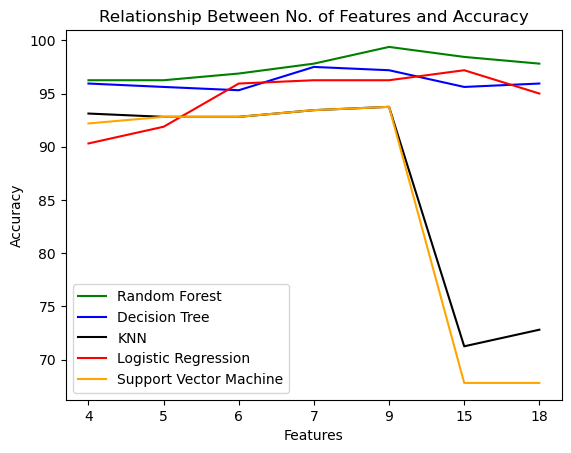

In [ ]:
#Get current axis
ax = plt.gca()

# line plot for Random Forest
accuracy_matrix.plot(kind = 'line',x = 'features',y = 'rf',label = "Random Forest",color = 'green',ax = ax)

# line plot for Decision Tree
accuracy_matrix.plot(kind = 'line',x = 'features',y = 'dt',label = "Decision Tree",color = 'blue',ax = ax)

# line plot for KNN
accuracy_matrix.plot(kind = 'line',x = 'features',y = 'knn',label = "KNN",color = 'black',ax = ax)

# line plot for Logistic Regression
accuracy_matrix.plot(kind = 'line',x = 'features',y = 'lr',label = "Logistic Regression",color = 'red',ax = ax)

# line plot for SVM
accuracy_matrix.plot(kind = 'line',x = 'features',y = 'svm',label = "Support Vector Machine",color = 'orange',ax = ax)

# set the title
plt.title('Relationship Between No. of Features and Accuracy')

plt.xlabel('Features')
plt.ylabel('Accuracy')

# show the plot
plt.show()


## Precision

In [ ]:
# A dictionary which represents data
data_dict = { 'features': n_Featurelist,               #['4','5','6','7','9','15','18'],
              'rf': rf_list[1],                        #[93.40,96.60,98.40,97.80,99.10,98.80,98.40],
              'dt': dt_list[1],                        #[93.10,96.20,97.20,96.90,97.50,95.60,95.60],
              'lr': lr_list[1],                        #[91.60,91.10,94.70,96.20,96.20,96.20,95.00],
              'knn' :knn_list[1],                       #[93.40,92.80,96.20,93.40,93.80,72.80,72.80],
              'svm' :svm_list[1],                      #[92.20,92.80,95.00,93.40,93.80,67.80,67.80]
              }
  
# creating a data frame object
precision_matrix = pd.DataFrame(data_dict)
  
# show the dataframe
precision_matrix

,features,rf,dt,lr,knn,svm
0,4,0.98,0.94,0.95,0.97,0.88
1,5,0.98,0.98,0.97,0.94,0.92
2,6,0.98,0.98,0.97,0.95,0.93
3,7,0.98,0.98,0.98,0.89,0.93
4,9,0.98,0.97,0.98,0.89,0.93
5,15,1.00,1.00,0.97,0.77,0.74
6,18,1.00,0.97,0.94,0.75,0.74


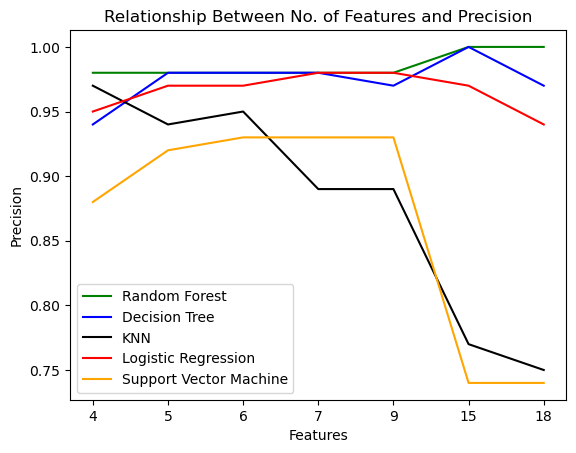

In [ ]:
#Get current axis
ax = plt.gca()

# line plot for Random Forest
precision_matrix.plot(kind = 'line',x = 'features',y = 'rf',label = "Random Forest",color = 'green',ax = ax)

# line plot for Decision Tree
precision_matrix.plot(kind = 'line',x = 'features',y = 'dt',label = "Decision Tree",color = 'blue',ax = ax)

# line plot for KNN
precision_matrix.plot(kind = 'line',x = 'features',y = 'knn',label = "KNN",color = 'black',ax = ax)

# line plot for Logistic Regression
precision_matrix.plot(kind = 'line',x = 'features',y = 'lr',label = "Logistic Regression",color = 'red',ax = ax)

# line plot for SVM
precision_matrix.plot(kind = 'line',x = 'features',y = 'svm',label = "Support Vector Machine",color = 'orange',ax = ax)

# set the title
plt.title('Relationship Between No. of Features and Precision')

plt.xlabel('Features')
plt.ylabel('Precision')

# show the plot
plt.show()


## F1-score

In [ ]:
# A dictionary which represents data
data_dict = { 'features': n_Featurelist,               #['4','5','6','7','9','15','18'],
              'rf': rf_list[2],                        #[93.40,96.60,98.40,97.80,99.10,98.80,98.40],
              'dt': dt_list[2],                        #[93.10,96.20,97.20,96.90,97.50,95.60,95.60],
              'lr': lr_list[2],                        #[91.60,91.10,94.70,96.20,96.20,96.20,95.00],
              'knn' :knn_list[2],                       #[93.40,92.80,96.20,93.40,93.80,72.80,72.80],
              'svm' :svm_list[2],                      #[92.20,92.80,95.00,93.40,93.80,67.80,67.80]
              }
  
# creating a data frame object
F1_matrix = pd.DataFrame(data_dict)
  
# show the dataframe
F1_matrix

,features,rf,dt,lr,knn,svm
0,4,0.99,0.95,0.96,0.97,0.89
1,5,0.99,0.99,0.97,0.95,0.92
2,6,0.99,0.99,0.97,0.96,0.94
3,7,0.99,0.99,0.99,0.90,0.94
4,9,0.99,0.97,0.99,0.90,0.94
5,15,1.00,1.00,0.97,0.75,0.69
6,18,1.00,0.97,0.95,0.72,0.69


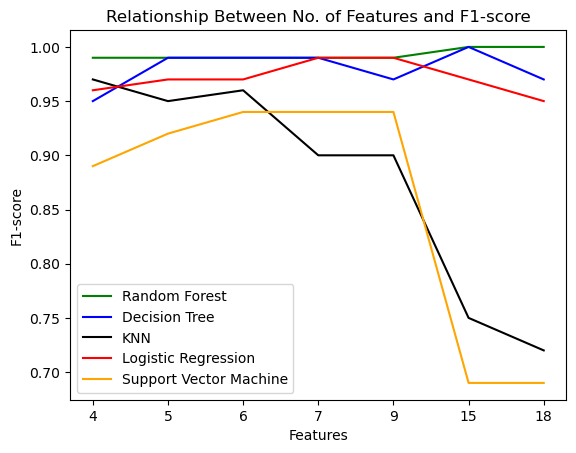

In [ ]:
#Get current axis
ax = plt.gca()

# line plot for Random Forest
F1_matrix.plot(kind = 'line',x = 'features',y = 'rf',label = "Random Forest",color = 'green',ax = ax)

# line plot for Decision Tree
F1_matrix.plot(kind = 'line',x = 'features',y = 'dt',label = "Decision Tree",color = 'blue',ax = ax)

# line plot for KNN
F1_matrix.plot(kind = 'line',x = 'features',y = 'knn',label = "KNN",color = 'black',ax = ax)

# line plot for Logistic Regression
F1_matrix.plot(kind = 'line',x = 'features',y = 'lr',label = "Logistic Regression",color = 'red',ax = ax)

# line plot for SVM
F1_matrix.plot(kind = 'line',x = 'features',y = 'svm',label = "Support Vector Machine",color = 'orange',ax = ax)

# set the title
plt.title('Relationship Between No. of Features and F1-score')

plt.xlabel('Features')
plt.ylabel('F1-score')

# show the plot
plt.show()

## Recall

In [ ]:
# A dictionary which represents data
data_dict = { 'features': n_Featurelist,               #['4','5','6','7','9','15','18'],
              'rf': rf_list[3],                        #[93.40,96.60,98.40,97.80,99.10,98.80,98.40],
              'dt': dt_list[3],                        #[93.10,96.20,97.20,96.90,97.50,95.60,95.60],
              'lr': lr_list[3],                        #[91.60,91.10,94.70,96.20,96.20,96.20,95.00],
              'knn' :knn_list[3],                       #[93.40,92.80,96.20,93.40,93.80,72.80,72.80],
              'svm' :svm_list[3],                      #[92.20,92.80,95.00,93.40,93.80,67.80,67.80]
              }
  
# creating a data frame object
recall_matrix = pd.DataFrame(data_dict)
  
# show the dataframe
recall_matrix

,features,rf,dt,lr,knn,svm
0,4,0.99,0.96,0.97,0.98,0.91
1,5,0.99,0.99,0.98,0.96,0.94
2,6,0.99,0.99,0.98,0.97,0.95
3,7,0.99,0.99,0.99,0.92,0.95
4,9,0.99,0.98,0.99,0.92,0.95
5,15,1.00,1.00,0.98,0.78,0.74
6,18,1.00,0.98,0.95,0.76,0.74


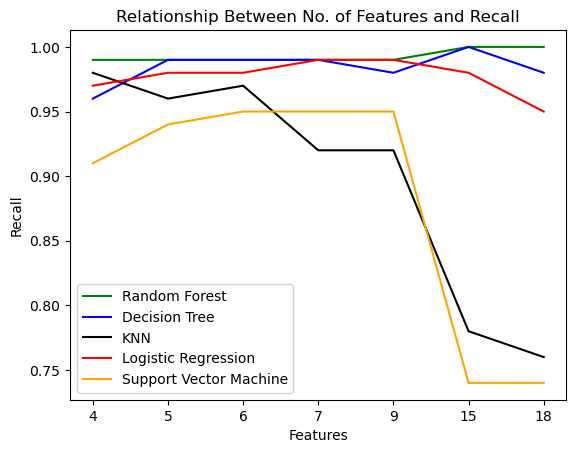

In [ ]:
#Get current axis
ax = plt.gca()

# line plot for Random Forest
recall_matrix.plot(kind = 'line',x = 'features',y = 'rf',label = "Random Forest",color = 'green',ax = ax)

# line plot for Decision Tree
recall_matrix.plot(kind = 'line',x = 'features',y = 'dt',label = "Decision Tree",color = 'blue',ax = ax)

# line plot for KNN
recall_matrix.plot(kind = 'line',x = 'features',y = 'knn',label = "KNN",color = 'black',ax = ax)

# line plot for Logistic Regression
recall_matrix.plot(kind = 'line',x = 'features',y = 'lr',label = "Logistic Regression",color = 'red',ax = ax)

# line plot for SVM
recall_matrix.plot(kind = 'line',x = 'features',y = 'svm',label = "Support Vector Machine",color = 'orange',ax = ax)

# set the title
plt.title('Relationship Between No. of Features and Recall')

plt.xlabel('Features')
plt.ylabel('Recall')

# show the plot
plt.show()